In [1]:
import os
import scanpy as sc
import scvi
import anndata as ad

# 定义包含 .h5ad 文件的目录
data_dir = "/data/work/final/sample"

# 获取目录中的所有 .h5ad 文件
h5ad_files = [f for f in os.listdir(data_dir) if f.endswith('.h5ad')]

# 读取并添加 batch 信息到每个 AnnData 对象
adatas = []
for file in h5ad_files:
    # 读取每个 .h5ad 文件
    adata = sc.read(os.path.join(data_dir, file))
    
    # 添加 batch 信息（文件名去掉 .h5ad 后缀）
    #batch_name = os.path.splitext(file)[0]
    #adata.obs['batch'] = batch_name
    
    # 将带有 batch 信息的 AnnData 对象添加到列表中
    adatas.append(adata)

# 合并所有 AnnData 对象
adata_combined = ad.concat(adatas, join='outer', label='sample', keys=[os.path.splitext(f)[0] for f in h5ad_files])

/usr/local/python/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/usr/local/python/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/usr/local/python/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/usr/local/python/lib/python3.9/site-pack

In [2]:
adata_combined.obs['sample']

CELL2_N3             OA_662_filter
CELL3_N5             OA_662_filter
CELL9_N5             OA_662_filter
CELL11_N3            OA_662_filter
CELL12_N3            OA_662_filter
                       ...        
CELL11608_N1    OA_L-0606-2_filter
CELL11609_N1    OA_L-0606-2_filter
CELL11610_N1    OA_L-0606-2_filter
CELL11611_N1    OA_L-0606-2_filter
CELL11612_N1    OA_L-0606-2_filter
Name: batch, Length: 146860, dtype: category
Categories (5, object): ['OA_662_filter', 'OA_687_filter', 'OA_SF5.22-D_filter', 'OA_175_filter', 'OA_L-0606-2_filter']

In [3]:
# 进行标准化和预处理（如果需要）
adata_combined.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)

# 设置 scVI 的 AnnData 格式
scvi.model.SCVI.setup_anndata(adata_combined, batch_key="sample")

print("数据整合完成，已准备好用于 scVI 的后续分析。")

数据整合完成，已准备好用于 scVI 的后续分析。


/usr/local/python/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/usr/local/python/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [4]:
vae = scvi.model.SCVI(adata_combined, n_layers=2, n_latent=30, gene_likelihood="nb")
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/54:   0%|          | 0/54 [00:00<?, ?it/s]

/usr/local/python/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 54/54: 100%|██████████| 54/54 [2:30:26<00:00, 166.50s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.5e+3]   

`Trainer.fit` stopped: `max_epochs=54` reached.


Epoch 54/54: 100%|██████████| 54/54 [2:30:26<00:00, 167.16s/it, v_num=1, train_loss_step=5.64e+3, train_loss_epoch=5.5e+3]


/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will b

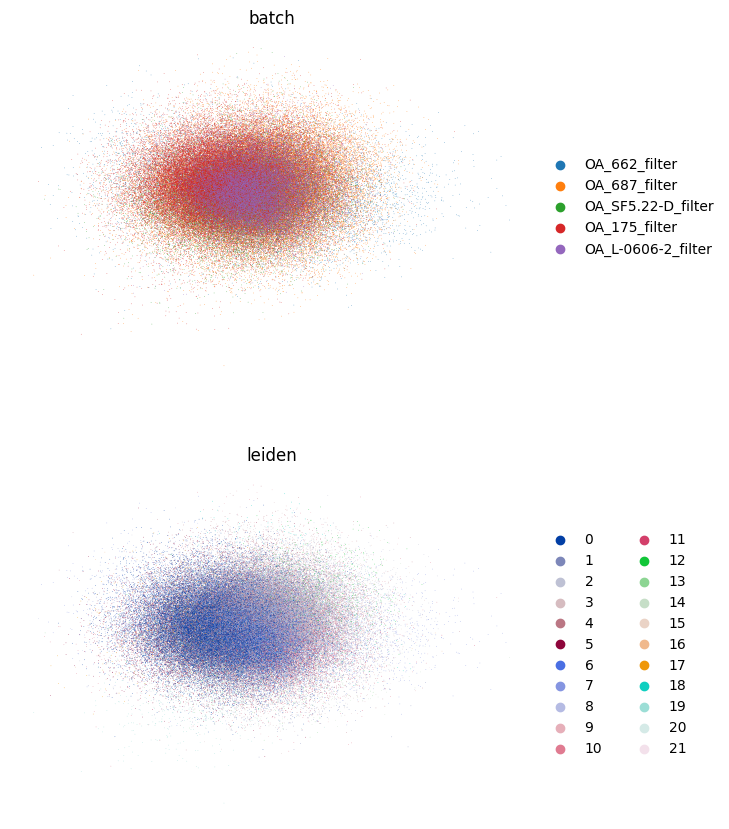

In [8]:
adata_combined.obsm["X_scVI"] = vae.get_latent_representation()
sc.pp.neighbors(adata_combined, use_rep="X_scVI")
sc.tl.leiden(adata_combined)
from scvi.model.utils import mde
#import pymde
#adata_combined.obsm["X_mde"] = mde(adata_combined.obsm["X_scVI"])
sc.pl.embedding(
    adata_combined,
    basis="X_scVI",
    color=["batch", "leiden"],
    frameon=False,
    ncols=1,
)

/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


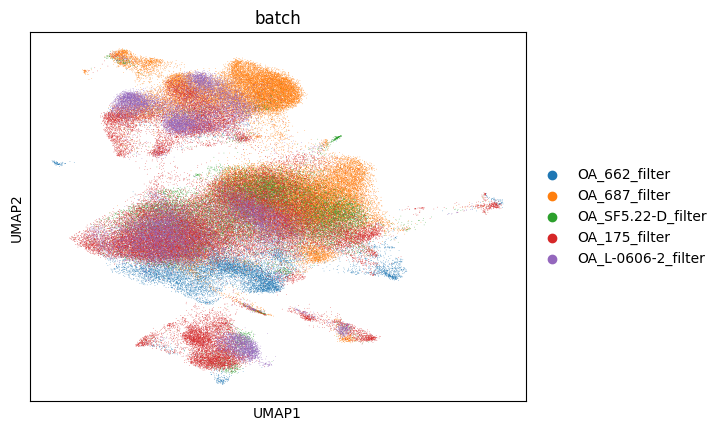

In [9]:
sc.pp.neighbors(adata_combined, use_rep='X_scVI', n_pcs=30)
sc.tl.umap(adata_combined, random_state=42)
sc.pl.umap(adata_combined,color='sample')

In [7]:
adata_combined.write('/data/work/SF/OA_integrate.h5ad')

In [1]:
?sc.tl.leiden

Object `sc.tl.leiden` not found.


In [2]:
sc.tl.leiden(adata,n_iterations=2)

NameError: name 'sc' is not defined

In [2]:
import warnings
warnings.filterwarnings("ignore")
import STCAT
import scanpy as sc
#import scvi

In [3]:
adata=sc.read('/data/work/paper/OA_all_auto_anno.h5ad')

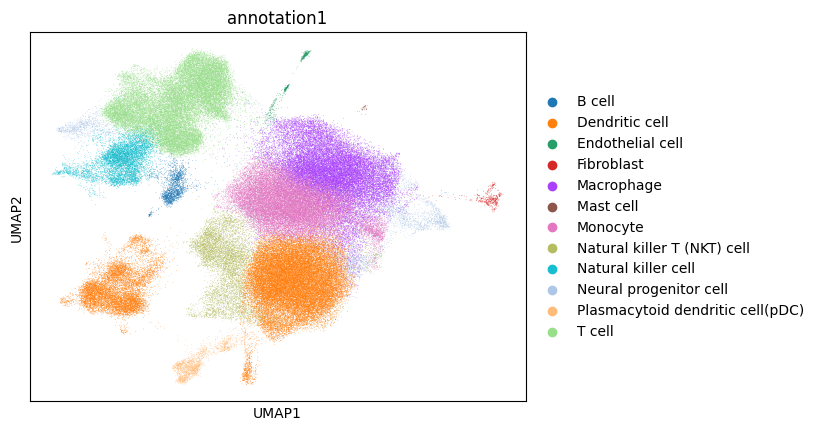

In [4]:
sc.pl.umap(adata,color='annotation1')

In [5]:
subadata=adata[adata.obs['annotation1'].isin (['T cell','Natural killer cell','Natural killer T(NKT) cell', 'Neural progenitor cell'])]

In [6]:
subadata

View of AnnData object with n_obs × n_vars = 39086 × 43163
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'percent_HB', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'n_counts', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_res_0.80', 'leiden_res_0.10', 'highlight', 'annotation1', 'phenotype', 'ctap', 'scsa_celltype_panglaodb', 'scsa_celltype_cellmarker', 'annotation2'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'annotation1_colors', 'annotation2_colors', 'batch_colors', 'dendrogram_leiden_res_0.20', 'dendrogram_leiden_res_0.30', 'highlight_colors', 'leiden', 'leiden_colors', 'leiden_res_0.10', 'leiden_res_0.10_colors', 'leiden_res_0.20', 'leiden_res_0.20_co

In [7]:
subadata.obs['cell_type']=subadata.obs['annotation1']

In [8]:
subadata = STCAT.STCAT(subadata)

🧮 T cell number : 22091
🧮 None T cell number : 16995
💬 The input file seems not a raw count matrix.
✔ All genes and log1p normalized expression to 10000 counts per cell.
🔬 Input data has 22091 cells and 43163 genes
🔗 Matching reference genes in the model
🧬 3163 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
⚡ Process of CD4
⚡ Process of CD8
🔬 Input data has 6728 cells and 43163 genes
🔗 Matching reference genes in the model
🔬 Input data has 14195 cells and 43163 genes
🔗 Matching reference genes in the model
🧬 2214 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with re

In [9]:
print(subadata.obs.Prediction.value_counts())

Prediction
None T                   16995
CD4 Tem                   3288
CD4 Tn                    2774
CD8 Tem                   2095
CD4 Tcm                   2000
CD4 Trm cell-death        1912
CD8 Trm                   1631
CD4 Tc                    1095
MAIT                       722
CD8 Trm naive-like         704
CD8 quiescence             680
CD4 Trm                    677
CD8 Tn                     603
Tgd                        446
CD4 Tex                    437
CD8 Temra                  404
CD4 Tn adhesion            319
Heterogeneous              222
CD8 proliferation          219
CD4 Temra                  217
CD4 Th17                   212
CD4 Tisg                   202
CD4 Tstr cytotoxicity      198
CD4 Tisg cell-death        181
CD4 Treg                   124
CD8 senescence             106
CD8 Tcm                     94
CD4 Trm naive-like          87
CD4 Tfh                     79
CD4 Tstr                    65
CD8 Tcm IFN-response        53
CD4 Tn regulating           

In [ ]:
subadata.write('/data/work/paper/T_subcluster/T')

In [2]:
import scvi
import scanpy as sc

In [3]:
adata=sc.read('/data/work/paper/T_subcluster/T_subcluster.h5ad')

/usr/local/python/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
scvi.model.SCVI.setup_anndata(adata, layer="counts")
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30)
model.train(max_epochs= 15)

/usr/local/python/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/15:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/python/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 15/15: 100%|██████████| 15/15 [13:25<00:00, 54.25s/it, v_num=1, train_loss_step=4.13e+3, train_loss_epoch=4.2e+3] 

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 15/15: 100%|██████████| 15/15 [13:25<00:00, 53.69s/it, v_num=1, train_loss_step=4.13e+3, train_loss_epoch=4.2e+3]


In [5]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="Prediction",
    unlabeled_category="Unknown"
)

In [6]:
scanvi_model.train(max_epochs=15)

INFO     Training for 15 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 15/15: 100%|██████████| 15/15 [17:14<00:00, 66.30s/it, v_num=1, train_loss_step=4.5e+3, train_loss_epoch=4.33e+3] 

`Trainer.fit` stopped: `max_epochs=15` reached.


Epoch 15/15: 100%|██████████| 15/15 [17:14<00:00, 68.95s/it, v_num=1, train_loss_step=4.5e+3, train_loss_epoch=4.33e+3]


In [7]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [8]:
sc.pp.neighbors(adata, use_rep="X_scANVI")
sc.tl.umap(adata, min_dist=0.3)

/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


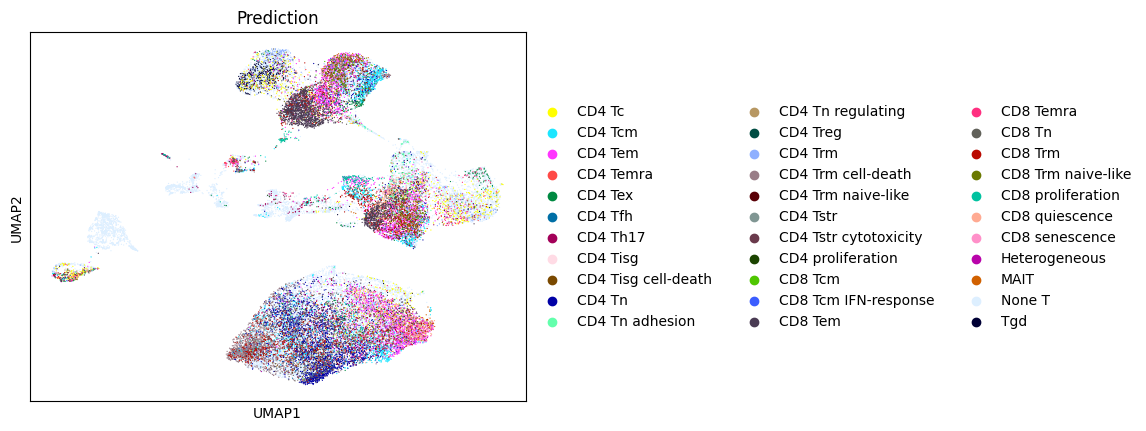

In [9]:
sc.pl.umap(adata,color=['Prediction'])

In [10]:
subadata=sc.read('/data/work/paper/T_subcluster/T_subcluster.h5ad')

/usr/local/python/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/python/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


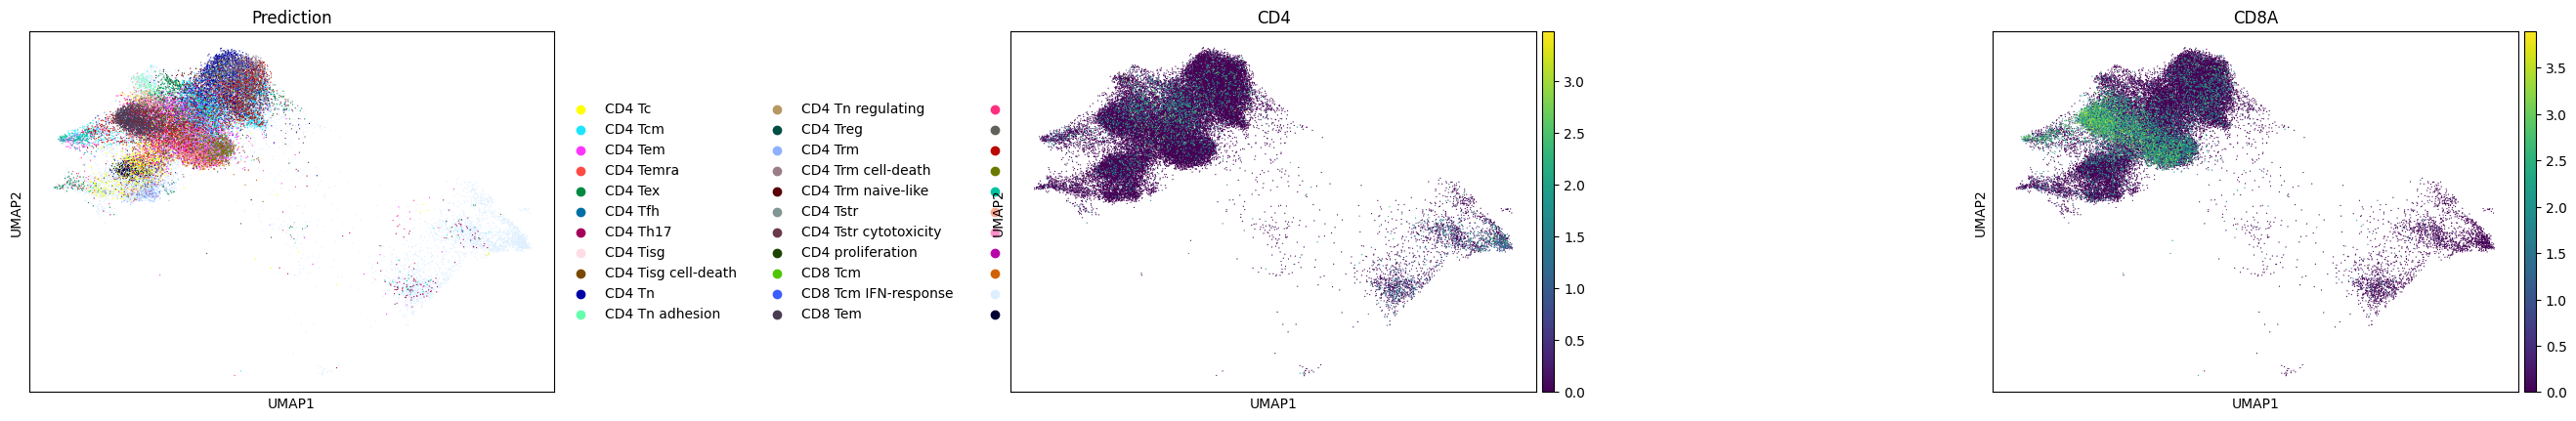

In [14]:
sc.pl.umap(subadata,color=['Prediction','CD4','CD8A'],wspace=0.7)